In [197]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import GridSearchCV

In [65]:
df_ccb = pd.read_csv("./home-credit-default-risk/credit_card_balance.csv")

In [198]:
df_ccb.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

In [199]:
df_ccb.shape

(3840312, 23)

In [200]:
df_test = df_ccb.iloc[0:10000,:]
df_test.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

In [201]:
df_test.shape

(10000, 23)

In [202]:
# 目的変数: SK_DPD(延滞日数)を二値にする
# 0→0
# 0以外→1

In [203]:
df_test["SK_DPD"].value_counts().head()

0    9758
1     242
Name: SK_DPD, dtype: int64

In [204]:
# Active→1, 非Active→0
# 削除

In [205]:
df_test["NAME_CONTRACT_STATUS"].value_counts().head()

Active           9228
Completed         756
Signed             10
Sent proposal       3
Demand              3
Name: NAME_CONTRACT_STATUS, dtype: int64

In [206]:
df_test = df_test.drop('NAME_CONTRACT_STATUS', axis=1)
df_test.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  \
0                 1700.325  ...                     0.000          0.000   
1                 2250.000  ...                 60175.080      64875.555   
2                 2250.000  ...                 26926.425      31460.085   
3                11795.760  ...                224949.285     233048.970   
4                22924.890  ...                443044.395     453919.455   

   AMT_TOTAL_RECEIVABLE  CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
0                 0.000                       0.0                     1   
1             64875.555                       1.0                     1   
2             31460.085                       0.0                     0   
3            233048.970                       1.0                     1   
4            453919.455                       0.0                     1   

   CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  \
0                         0.0                       1.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       1.0   

   CNT_INSTALMENT_MATURE_CUM  SK_DPD  SK_DPD_DEF  
0                       35.0       0           0  
1                       69.0       0           0  
2                       30.0       0           0  
3                       10.0       0           0  
4                      101.0       0           0  

[5 rows x 22 columns]

In [207]:
df_test.loc[df_test["SK_DPD"] > 0, 'SK_DPD'] = 1

In [208]:
df_test["SK_DPD"].head()

0    0
1    0
2    0
3    0
4    0
Name: SK_DPD, dtype: int64

In [209]:
df_test.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  \
0                 1700.325  ...                     0.000          0.000   
1                 2250.000  ...                 60175.080      64875.555   
2                 2250.000  ...                 26926.425      31460.085   
3                11795.760  ...                224949.285     233048.970   
4                22924.890  ...                443044.395     453919.455   

   AMT_TOTAL_RECEIVABLE  CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
0                 0.000                       0.0                     1   
1             64875.555                       1.0                     1   
2             31460.085                       0.0                     0   
3            233048.970                       1.0                     1   
4            453919.455                       0.0                     1   

   CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  \
0                         0.0                       1.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       1.0   

   CNT_INSTALMENT_MATURE_CUM  SK_DPD  SK_DPD_DEF  
0                       35.0       0           0  
1                       69.0       0           0  
2                       30.0       0           0  
3                       10.0       0           0  
4                      101.0       0           0  

[5 rows x 22 columns]

In [210]:
# SK_ID_PREV列削除
df_test = df_test.drop('SK_ID_PREV', axis=1)

In [211]:
df_test.head()

SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  AMT_CREDIT_LIMIT_ACTUAL  \
0      378907              -6       56.970                   135000   
1      363914              -1    63975.555                    45000   
2      371185              -7    31815.225                   450000   
3      337855              -4   236572.110                   225000   
4      126868              -1   453919.455                   450000   

   AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                 877.5                         0.0   
1                    2250.0                2250.0                         0.0   
2                       0.0                   0.0                         0.0   
3                    2250.0                2250.0                         0.0   
4                       0.0               11547.0                         0.0   

   AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  \
0                     877.5                 1700.325               1800.0   
1                       0.0                 2250.000               2250.0   
2                       0.0                 2250.000               2250.0   
3                       0.0                11795.760              11925.0   
4                   11547.0                22924.890              27000.0   

   ...  AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0  ...                     0.000          0.000                 0.000   
1  ...                 60175.080      64875.555             64875.555   
2  ...                 26926.425      31460.085             31460.085   
3  ...                224949.285     233048.970            233048.970   
4  ...                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  SK_DPD  SK_DPD_DEF  
0                       1.0                       35.0       0           0  
1                       0.0                       69.0       0           0  
2                       0.0                       30.0       0           0  
3                       0.0                       10.0       0           0  
4                       1.0                      101.0       0           0  

[5 rows x 21 columns]

In [221]:
df_test = df_test.fillna(0)

In [222]:
x = df_test[["MONTHS_BALANCE",
      "AMT_BALANCE",
      "AMT_CREDIT_LIMIT_ACTUAL",
      "AMT_DRAWINGS_ATM_CURRENT",
      "AMT_DRAWINGS_CURRENT",
      "AMT_DRAWINGS_OTHER_CURRENT",
      "AMT_DRAWINGS_POS_CURRENT",
      "AMT_INST_MIN_REGULARITY",
      "AMT_PAYMENT_CURRENT",
      "AMT_RECIVABLE",
      "AMT_TOTAL_RECEIVABLE",
      "CNT_DRAWINGS_ATM_CURRENT",
      "CNT_DRAWINGS_CURRENT",
      "CNT_DRAWINGS_OTHER_CURRENT",
      "CNT_DRAWINGS_POS_CURRENT",
      "CNT_INSTALMENT_MATURE_CUM"]]      

In [223]:
df_test["MONTHS_BALANCE"] = pd.to_numeric(df_test["MONTHS_BALANCE"], errors='coerce')
df_test["AMT_BALANCE"] = pd.to_numeric(df_test["AMT_BALANCE"], errors='coerce')
df_test["AMT_CREDIT_LIMIT_ACTUAL"] = pd.to_numeric(df_test["AMT_CREDIT_LIMIT_ACTUAL"], errors='coerce')
df_test["AMT_DRAWINGS_ATM_CURRENT"] = pd.to_numeric(df_test["AMT_DRAWINGS_ATM_CURRENT"], errors='coerce')
df_test["AMT_DRAWINGS_CURRENT"] = pd.to_numeric(df_test["AMT_DRAWINGS_CURRENT"], errors='coerce')
df_test["AMT_DRAWINGS_OTHER_CURRENT"] = pd.to_numeric(df_test["AMT_DRAWINGS_OTHER_CURRENT"], errors='coerce')
df_test["AMT_DRAWINGS_POS_CURRENT"] = pd.to_numeric(df_test["AMT_DRAWINGS_POS_CURRENT"], errors='coerce')
df_test["AMT_INST_MIN_REGULARITY"] = pd.to_numeric(df_test["AMT_INST_MIN_REGULARITY"], errors='coerce')
df_test["AMT_PAYMENT_CURRENT"] = pd.to_numeric(df_test["AMT_PAYMENT_CURRENT"], errors='coerce')
df_test["AMT_RECIVABLE"] = pd.to_numeric(df_test["AMT_RECIVABLE"], errors='coerce')
df_test["AMT_TOTAL_RECEIVABLE"] = pd.to_numeric(df_test["AMT_TOTAL_RECEIVABLE"], errors='coerce')
df_test["CNT_DRAWINGS_ATM_CURRENT"] = pd.to_numeric(df_test["CNT_DRAWINGS_ATM_CURRENT"], errors='coerce')
df_test["CNT_DRAWINGS_CURRENT"] = pd.to_numeric(df_test["CNT_DRAWINGS_CURRENT"], errors='coerce')
df_test["CNT_DRAWINGS_OTHER_CURRENT"] = pd.to_numeric(df_test["CNT_DRAWINGS_OTHER_CURRENT"], errors='coerce')
df_test["CNT_DRAWINGS_POS_CURRENT"] = pd.to_numeric(df_test["CNT_DRAWINGS_POS_CURRENT"], errors='coerce')
df_test["CNT_INSTALMENT_MATURE_CUM"] = pd.to_numeric(df_test["CNT_INSTALMENT_MATURE_CUM"], errors='coerce')

In [224]:
df_test

SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  AMT_CREDIT_LIMIT_ACTUAL  \
0         378907              -6       56.970                   135000   
1         363914              -1    63975.555                    45000   
2         371185              -7    31815.225                   450000   
3         337855              -4   236572.110                   225000   
4         126868              -1   453919.455                   450000   
5         380010              -7    82903.815                   270000   
6         171320              -6   353451.645                   585000   
7         118650              -7    47962.125                    45000   
8         367360              -4   291543.075                   292500   
9         203885              -5   201261.195                   225000   
10        209660              -7   102076.560                   180000   
11        340339              -1   131669.145                   225000   
12        302517              -4     1427.265                   135000   
13        171537              -5        0.000                   270000   
14        303581              -1        0.000                    45000   
15        289902              -1   131294.340                   135000   
16        255981              -6    72899.955                   450000   
17        276642              -6        0.000                    67500   
18        302450              -3        0.000                        0   
19        231608              -4   452774.700                   450000   
20        259807              -6    45413.730                    45000   
21        217113              -1    68710.140                    67500   
22        132481              -1    85792.095                   135000   
23        105755              -5   464452.470                   450000   
24        323730              -3   152801.550                   157500   
25        195164              -6   134249.445                   157500   
26        184131              -3    67609.125                   450000   
27        387286              -6    76235.940                   180000   
28        213409              -2   137812.185                   180000   
29        406607              -4        0.000                   270000   
...          ...             ...          ...                      ...   
9970      323316             -84        0.000                    67500   
9971      394371             -79        0.000                   180000   
9972      303669             -82   185154.165                   180000   
9973      118775             -80    91532.745                    90000   
9974      324806             -82        0.000                   157500   
9975      313783             -87    28262.205                    90000   
9976      377683             -87   120095.820                   135000   
9977      224757             -88    28220.400                    67500   
9978      447683             -79        0.000                    67500   
9979      116017             -82    50366.610                    90000   
9980      321930             -83   110351.520                   180000   
9981      134015             -87   170950.500                   225000   
9982      354282             -83    62176.950                    67500   
9983      322181             -80    64667.925                    90000   
9984      298600             -88   180445.410                   180000   
9985      181050             -80   110338.965                   112500   
9986      130513             -89    91642.860                   112500   
9987      221749             -85    31867.290                    67500   
9988      353843             -81   157648.095                   157500   
9989      243336             -79    55199.745                    67500   
9990      350371             -80   137168.595                   135000   
9991      189714             -87        0.000                   112500   
9992      

In [263]:
df_test["AMT_PAYMENT_TOTAL_CURRENT"].head()

0     1800.0
1     2250.0
2     2250.0
3    11925.0
4    27000.0
Name: AMT_PAYMENT_TOTAL_CURRENT, dtype: float64

In [225]:
y = df_test["SK_DPD"]

In [226]:
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.2)

In [227]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 16), (2000, 16), (8000,), (2000,))

In [228]:
lr = LogisticRegression()

In [229]:
lr.fit(x_train, y_train)

/Users/takehara/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [230]:
y_pred = lr.predict(x_test)

In [231]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [232]:
accuracy_score(y_test, y_pred)

0.972

In [233]:
#相関係数行列
corr_mat = df_ccb.corr(method='pearson')
display(corr_mat)

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  \
SK_ID_PREV                    1.000000    0.004723        0.003670   
SK_ID_CURR                    0.004723    1.000000        0.001696   
MONTHS_BALANCE                0.003670    0.001696        1.000000   
AMT_BALANCE                   0.005046    0.003510        0.014558   
AMT_CREDIT_LIMIT_ACTUAL       0.006631    0.005991        0.199900   
AMT_DRAWINGS_ATM_CURRENT      0.004342    0.000814        0.036802   
AMT_DRAWINGS_CURRENT          0.002624    0.000708        0.065527   
AMT_DRAWINGS_OTHER_CURRENT   -0.000160    0.000958        0.000405   
AMT_DRAWINGS_POS_CURRENT      0.001721   -0.000786        0.118146   
AMT_INST_MIN_REGULARITY       0.006460    0.003300       -0.087529   
AMT_PAYMENT_CURRENT           0.003472    0.000127        0.076355   
AMT_PAYMENT_TOTAL_CURRENT     0.001641    0.000784        0.035614   
AMT_RECEIVABLE_PRINCIPAL      0.005140    0.003589        0.016266   
AMT_RECIVABLE                 0.005035    0.003518        0.013172   
AMT_TOTAL_RECEIVABLE          0.005032    0.003524        0.013084   
CNT_DRAWINGS_ATM_CURRENT      0.002821    0.002082        0.002536   
CNT_DRAWINGS_CURRENT          0.000367    0.002654        0.113321   
CNT_DRAWINGS_OTHER_CURRENT   -0.001412   -0.000131       -0.026192   
CNT_DRAWINGS_POS_CURRENT      0.000809    0.002135        0.160207   
CNT_INSTALMENT_MATURE_CUM    -0.007219   -0.000581       -0.008620   
SK_DPD                       -0.001797   -0.000939        0.039362   
SK_DPD_DEF                    0.001973    0.001519        0.001659   

                            AMT_BALANCE  AMT_CREDIT_LIMIT_ACTUAL  \
SK_ID_PREV                     0.005046                 0.006631   
SK_ID_CURR                     0.003510                 0.005991   
MONTHS_BALANCE                 0.014558                 0.199900   
AMT_BALANCE                    1.000000                 0.489386   
AMT_CREDIT_LIMIT_ACTUAL        0.489386                 1.000000   
AMT_DRAWINGS_ATM_CURRENT       0.283551                 0.247219   
AMT_DRAWINGS_CURRENT           0.336965                 0.263093   
AMT_DRAWINGS_OTHER_CURRENT     0.065366                 0.050579   
AMT_DRAWINGS_POS_CURRENT       0.169449                 0.234976   
AMT_INST_MIN_REGULARITY        0.896728                 0.467620   
AMT_PAYMENT_CURRENT            0.143934                 0.308294   
AMT_PAYMENT_TOTAL_CURRENT      0.151349                 0.226570   
AMT_RECEIVABLE_PRINCIPAL       0.999720                 0.490445   
AMT_RECIVABLE                  0.999917                 0.488641   
AMT_TOTAL_RECEIVABLE           0.999897                 0.488598   
CNT_DRAWINGS_ATM_CURRENT       0.309968                 0.221808   
CNT_DRAWINGS_CURRENT           0.259184                 0.204237   
CNT_DRAWINGS_OTHER_CURRENT     0.046563                 0.030051   
CNT_DRAWINGS_POS_CURRENT       0.155553                 0.202868   
CNT_INSTALMENT_MATURE_CUM      0.005009                -0.157269   
SK_DPD                        -0.046963                -0.038747   
SK_DPD_DEF                     0.013009                -0.002236   

                            AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
SK_ID_PREV                                  0.004342              0.002624   
SK_ID_CURR                                  0.000814              0.000708   
MONTHS_BALANCE                              0.036802              0.065527   
AMT_BALANCE                                 0.283551              0.336965   
AMT_CREDIT_LIMIT_ACTUAL                     0.247219              0.263093   
AMT_DRAWINGS_ATM_CURRENT                    1.000000              0.800190   
AMT_DRAWINGS_CURRENT                        0.800190              1.000000   
AMT_DRAWINGS_OTHER_CURRENT                  0.017899              0.236297   
AMT_DRAWINGS_POS_CURRENT                    0.078971              0.615591   
AMT_INST_MIN_REGULARITY                     0.094824              0.1244

In [264]:
#算出用
import numpy as np
import pandas as pd

#グラフ用
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#train,test用
from sklearn.model_selection import train_test_split

#データセットの読み込み
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris

import seaborn as sns
sns.set()

import statsmodels.api as smf#回帰分析用
%config InlineBackend.figure_format = 'retina'

In [271]:
#ヒートマップの作成

plt.figure(figsize=(12,8))
sns.heatmap(corr_mat,
           vmin=-1.0,
           vmax=1.0,
           center=0,
           annot=True,
           fmt='.1f',
            cmap='coolwarm',
           xticklabels=corr_mat.columns.values,
           yticklabels=corr_mat.columns.values
          )
plt.show()

In [272]:
#VIFの計算
# ones: 1の行列
I = np.ones((22,22))#全要素が1で相関係数行列と同じサイズの行列
VIF = 1/(I - corr_mat*corr_mat)
display(VIF)

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  \
SK_ID_PREV                         inf    1.000022        1.000013   
SK_ID_CURR                    1.000022         inf        1.000003   
MONTHS_BALANCE                1.000013    1.000003             inf   
AMT_BALANCE                   1.000025    1.000012        1.000212   
AMT_CREDIT_LIMIT_ACTUAL       1.000044    1.000036        1.041623   
AMT_DRAWINGS_ATM_CURRENT      1.000019    1.000001        1.001356   
AMT_DRAWINGS_CURRENT          1.000007    1.000001        1.004312   
AMT_DRAWINGS_OTHER_CURRENT    1.000000    1.000001        1.000000   
AMT_DRAWINGS_POS_CURRENT      1.000003    1.000001        1.014156   
AMT_INST_MIN_REGULARITY       1.000042    1.000011        1.007720   
AMT_PAYMENT_CURRENT           1.000012    1.000000        1.005864   
AMT_PAYMENT_TOTAL_CURRENT     1.000003    1.000001        1.001270   
AMT_RECEIVABLE_PRINCIPAL      1.000026    1.000013        1.000265   
AMT_RECIVABLE                 1.000025    1.000012        1.000174   
AMT_TOTAL_RECEIVABLE          1.000025    1.000012        1.000171   
CNT_DRAWINGS_ATM_CURRENT      1.000008    1.000004        1.000006   
CNT_DRAWINGS_CURRENT          1.000000    1.000007        1.013009   
CNT_DRAWINGS_OTHER_CURRENT    1.000002    1.000000        1.000687   
CNT_DRAWINGS_POS_CURRENT      1.000001    1.000005        1.026342   
CNT_INSTALMENT_MATURE_CUM     1.000052    1.000000        1.000074   
SK_DPD                        1.000003    1.000001        1.001552   
SK_DPD_DEF                    1.000004    1.000002        1.000003   

                            AMT_BALANCE  AMT_CREDIT_LIMIT_ACTUAL  \
SK_ID_PREV                     1.000025                 1.000044   
SK_ID_CURR                     1.000012                 1.000036   
MONTHS_BALANCE                 1.000212                 1.041623   
AMT_BALANCE                         inf                 1.314921   
AMT_CREDIT_LIMIT_ACTUAL        1.314921                      inf   
AMT_DRAWINGS_ATM_CURRENT       1.087430                 1.065096   
AMT_DRAWINGS_CURRENT           1.128090                 1.074366   
AMT_DRAWINGS_OTHER_CURRENT     1.004291                 1.002565   
AMT_DRAWINGS_POS_CURRENT       1.029562                 1.058440   
AMT_INST_MIN_REGULARITY        5.105175                 1.279866   
AMT_PAYMENT_CURRENT            1.021155                 1.105028   
AMT_PAYMENT_TOTAL_CURRENT      1.023444                 1.054112   
AMT_RECEIVABLE_PRINCIPAL    1788.683327                 1.316719   
AMT_RECIVABLE               6015.740814                 1.313663   
AMT_TOTAL_RECEIVABLE        4862.423407                 1.313591   
CNT_DRAWINGS_ATM_CURRENT       1.106293                 1.051745   
CNT_DRAWINGS_CURRENT           1.072014                 1.043528   
CNT_DRAWINGS_OTHER_CURRENT     1.002173                 1.000904   
CNT_DRAWINGS_POS_CURRENT       1.024797                 1.042922   
CNT_INSTALMENT_MATURE_CUM      1.000025                 1.025361   
SK_DPD                         1.002210                 1.001504   
SK_DPD_DEF                     1.000169                 1.000005   

                            AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
SK_ID_PREV                                  1.000019              1.000007   
SK_ID_CURR                                  1.000001              1.000001   
MONTHS_BALANCE                              1.001356              1.004312   
AMT_BALANCE                                 1.087430              1.128090   
AMT_CREDIT_LIMIT_ACTUAL                     1.065096              1.074366   
AMT_DRAWINGS_ATM_CURRENT                         inf              2.780125   
AMT_DRAWINGS_CURRENT                        2.780125                   inf   
AMT_DRAWINGS_OTHER_CURRENT                  1.000320              1.059138   
AMT_DRAWINGS_POS_CURRENT                    1.006276              1.610184   
AMT_INST_MIN_REGULARITY                     1.009073              1.0157

In [319]:
import warnings
warnings.filterwarnings("ignore")
#Data Manipulation and Treatment
import numpy as np
import pandas as pd
from datetime import datetime
#Plotting and Visualizations
import matplotlib.pyplot as plt
import japanize_matplotlib

%matplotlib inline 
import seaborn as sns
# from scipy import stats
# import itertools
#Scikit-Learn for Modeling
#from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [320]:
# # RMSPE評価関数
# def rmspe(y, yhat):
#     rmspe = np.sqrt(np.mean( ( (y - yhat) / y ) **2 ))
#     return rmspe

# ランダムフォレスト

In [321]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [322]:
model = RandomForestClassifier(bootstrap=True, 
                              n_estimators=10,
                              criterion="gini",
                              max_depth=None,
                              random_state=1)

In [323]:
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [324]:
y_test_pred = model.predict(x_test)
ac_score = accuracy_score(y_test, y_test_pred)

In [325]:
print(ac_score)

0.985


In [309]:
model.feature_importances_

array([0.11031134, 0.14608975, 0.05249778, 0.01065666, 0.02354111,
       0.0035461 , 0.01107028, 0.06423891, 0.2163179 , 0.11186794,
       0.16658814, 0.01005152, 0.0136244 , 0.        , 0.00400776,
       0.05559042])

In [310]:
df_ccb.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [311]:
importances = model.feature_importances_

indices = np.argsort(importances)[::-1]

names = [df_ccb.columns[i] for i in indices]



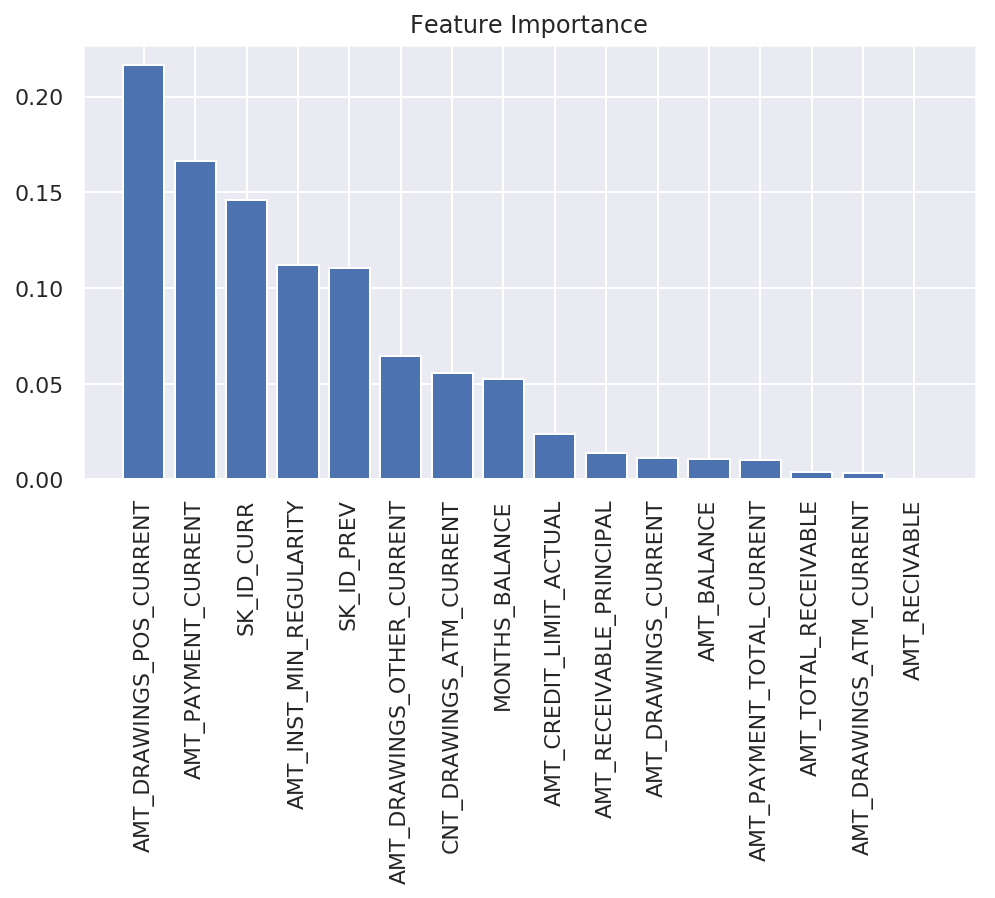

In [312]:
plt.figure(figsize=(8,4))
plt.title("Feature Importance")
plt.bar(range(x_train.shape[1]), importances[indices])
plt.xticks(range(x_train.shape[1]), names, rotation=90)
plt.show()